## Observations and Insights

## Dependencies and starter code

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
treatment_table_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")
mean = treatment_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = treatment_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = treatment_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_d = treatment_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = treatment_table_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_treatment_table_df = pd.DataFrame({"Mean": mean,
                           "Median": median,
                           "Variance": var,
                           "Standard Deviation": std_d,
                           "Standard Error of Mean": sem})
summary_treatment_table_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#counts the number of times a drug comes up and resets the index of num_treat
num_treat = pd.DataFrame(treatment_table_df.groupby("Drug Regimen").count()).reset_index()
#grouping our data
treat_data = num_treat[["Drug Regimen", "Mouse ID"]]
treat_data = treat_data.rename(columns = {"Mouse ID": "Count"})
treat_data = treat_data.set_index("Drug Regimen")


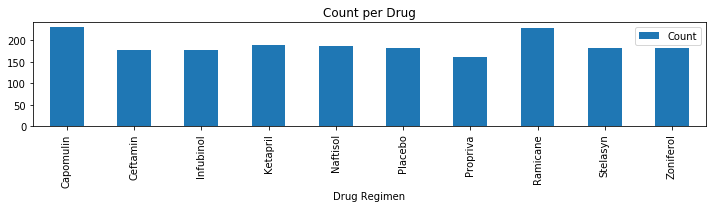

In [19]:
treat_data.plot(kind = 'bar' , figsize=(10,3))
plt.title("Count per Drug")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Drugs')

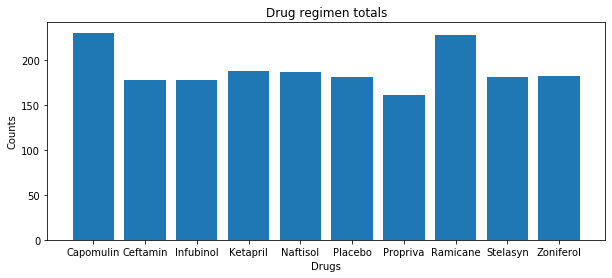

In [20]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = summary_treatment_table_df.index.tolist()
drug_count = (treatment_table_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
# Generate a pie plot showing the distribution of female versus male mice using pandas
x_axis = len(drug_count)
x_axis = drugs
plt.figure(figsize=(10,4))
plt.bar(x_axis, drug_count, align = "center")
plt.title("Drug regimen totals")
plt.ylabel("Counts")
plt.xlabel("Drugs")

## Pie plots


In [21]:
sex_df = pd.DataFrame(treatment_table_df.groupby('Sex').count()).reset_index()
sex_df = sex_df[["Sex","Mouse ID"]]
sex_df = sex_df.rename(columns = {"Mouse ID":"Count"})


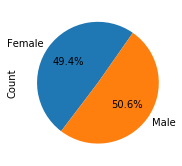

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ax1 = plt.subplot(121, aspect = 'equal')
sex_df.plot(kind = "pie",y = "Count", ax = ax1, labels = sex_df["Sex"], autopct='%1.1f%%', startangle = 55, legend = False)


## Quartiles, outliers and boxplots

In [23]:

mt_df = treatment_table_df.groupby("Mouse ID")['Timepoint'].max()
final_merge = pd.merge(mt_df, treatment_table_df, on = ["Mouse ID","Timepoint"], how = "left")


In [24]:
final_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


The lower quartile of Capomulin Tumor Volume (mm3) is: 32.37735684
The upper quartile of Capomulin Tumor Volume (mm3) is: 40.1592203
The interquartile  of Capomulin Tumor Volume (mm3) is: 7.781863460000004
The the median of Capomulin Tumor Volume (mm3) is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


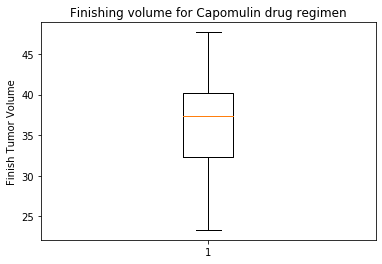

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Last_Stage = final_merge.sort_values(["Timepoint","Mouse ID","Drug Regimen"], ascending = True)
Max_Time = Tumor_Last_Stage[Tumor_Last_Stage["Timepoint"] == 45]
cap_data = Max_Time[Max_Time["Drug Regimen"].isin(['Capomulin'])]
cap_values = cap_data.sort_values(["Tumor Volume (mm3)"], ascending = True).reset_index()
cap_values = cap_values["Tumor Volume (mm3)"]
quartiles = cap_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile  of Capomulin Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Capomulin Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Finishing volume for Capomulin drug regimen")
ax1.set_ylabel("Finish Tumor Volume")
ax1.boxplot(cap_values)
plt.show()

The lower quartile of Infubinol Tumor Volume (mm3) is: 62.75445141
The upper quartile of Infubinol Tumor Volume (mm3) is: 67.68556862
The interquartile  of Infubinol Tumor Volume (mm3) is: 4.9311172099999965
The the median of Infubinol Tumor Volume (mm3) is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


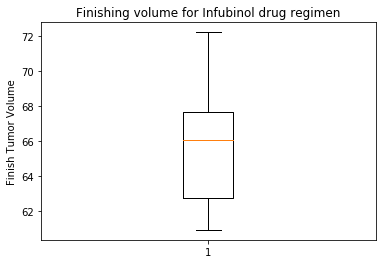

In [26]:
inf_data = Max_Time[Max_Time["Drug Regimen"].isin(['Infubinol'])]
inf_values = inf_data.sort_values(["Tumor Volume (mm3)"], ascending = True).reset_index()
inf_values = inf_values["Tumor Volume (mm3)"]

quartiles = inf_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile  of Infubinol Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Infubinol Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Finishing volume for Infubinol drug regimen")
ax1.set_ylabel("Finish Tumor Volume")
ax1.boxplot(inf_values)
plt.show()

The lower quartile of Ramicane Tumor Volume (mm3) is: 30.981175224999998
The upper quartile of Ramicane Tumor Volume (mm3) is: 38.508305307499995
The interquartile  of Ramicane Tumor Volume (mm3) is: 7.527130082499998
The the median of Ramicane Tumor Volume (mm3) is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


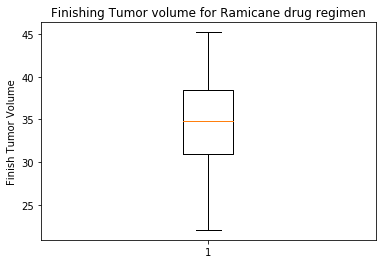

In [27]:
ram_data = Max_Time[Max_Time["Drug Regimen"].isin(['Ramicane'])]
ram_values = ram_data.sort_values(["Tumor Volume (mm3)"], ascending = True).reset_index()
ram_values = ram_values["Tumor Volume (mm3)"]

quartiles = ram_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile  of Ramicane Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Ramicane Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Finishing Tumor volume for Ramicane drug regimen")
ax1.set_ylabel("Finish Tumor Volume")
ax1.boxplot(ram_values)
plt.show()

The lower quartile of Placebo Tumor Volume (mm3) is: 65.95582006000001
The upper quartile of Placebo Tumor Volume (mm3) is: 71.48679182000001
The interquartile  of Placebo Tumor Volume (mm3) is: 5.53097176
The the median of Placebo Tumor Volume (mm3) is: 69.04284082 
Values below 57.65936242000001 could be outliers.
Values above 79.78324946000001 could be outliers.


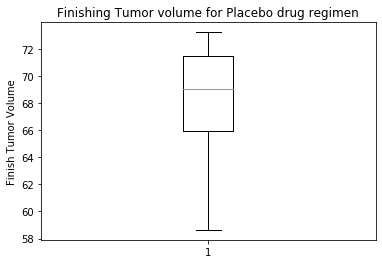

In [28]:
plc_data = Max_Time[Max_Time["Drug Regimen"].isin(['Placebo'])]
plc_values = plc_data.sort_values(["Tumor Volume (mm3)"], ascending = True).reset_index()
plc_values = plc_values["Tumor Volume (mm3)"]

quartiles = plc_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Placebo Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Placebo Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile  of Placebo Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Placebo Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title("Finishing Tumor volume for Placebo drug regimen")
ax1.set_ylabel("Finish Tumor Volume")
ax1.boxplot(plc_values)
plt.show()

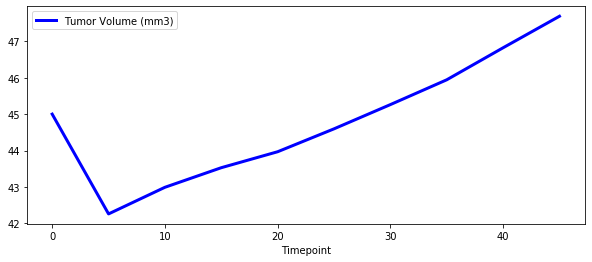

In [29]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_prog = treatment_table_df[treatment_table_df["Drug Regimen"] == "Capomulin"]
capo_prog = capo_prog.reset_index()
cap_mouse = capo_prog[capo_prog['Mouse ID'] == "i557"]
cap_mouse = cap_mouse[["Timepoint","Tumor Volume (mm3)"]]
cap_mouse.set_index("Timepoint").plot(figsize = (10,4),linewidth= "3", color="blue")

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plot.scatter()

NameError: name 'plot' is not defined

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen